In [1]:
import pandas as pd
import numpy as np
import sklearn 
data = pd.read_csv("candy.csv")  

In [2]:
dropcols = ['competitorname']
data = data.drop(columns=dropcols)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   pluribus          85 non-null     int64  
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
 11  winpercent        85 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 8.1 KB


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [3]:
#Процент пропусков для каждого признака 
data.isnull().sum()/len(data) * 100

chocolate           0.0
fruity              0.0
caramel             0.0
peanutyalmondy      0.0
nougat              0.0
crispedricewafer    0.0
hard                0.0
bar                 0.0
pluribus            0.0
sugarpercent        0.0
pricepercent        0.0
winpercent          0.0
dtype: float64

In [4]:
# посчитаем дисперсию всех числовых переменных
data.var()

chocolate             0.248739
fruity                0.250140
caramel               0.139216
peanutyalmondy        0.139216
nougat                0.076471
crispedricewafer      0.076471
hard                  0.147059
bar                   0.188235
pluribus              0.252661
sugarpercent          0.079963
pricepercent          0.081647
winpercent          216.512314
dtype: float64

In [5]:
dropcols = ['nougat', 'crispedricewafer', 'winpercent']
data = data.drop(columns=dropcols)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   chocolate       85 non-null     int64  
 1   fruity          85 non-null     int64  
 2   caramel         85 non-null     int64  
 3   peanutyalmondy  85 non-null     int64  
 4   hard            85 non-null     int64  
 5   bar             85 non-null     int64  
 6   pluribus        85 non-null     int64  
 7   sugarpercent    85 non-null     float64
 8   pricepercent    85 non-null     float64
dtypes: float64(2), int64(7)
memory usage: 6.1 KB


In [6]:
data1=data
data1.to_csv('data1.csv', index=False)
data1

,chocolate,fruity,caramel,peanutyalmondy,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,0.732,0.860
1,1,0,0,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0.906,0.511
...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0.220,0.116
81,0,1,0,0,1,0,0,0.093,0.116
82,0,1,0,0,0,0,1,0.313,0.313
83,0,0,1,0,1,0,0,0.186,0.267


In [7]:
data1.corr()#Высококорреляционный фильтр

,chocolate,fruity,caramel,peanutyalmondy,hard,bar,pluribus,sugarpercent,pricepercent
chocolate,1.000000,-0.741721,0.249875,0.377824,-0.344177,0.597421,-0.339675,0.104169,0.504675
fruity,-0.741721,1.000000,-0.335485,-0.399280,0.390678,-0.515066,0.299725,-0.034393,-0.430969
caramel,0.249875,-0.335485,1.000000,0.059356,-0.122355,0.333960,-0.269585,0.221933,0.254327
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,-0.205557,0.260420,-0.206109,0.087889,0.309153
hard,-0.344177,0.390678,-0.122355,-0.205557,1.000000,-0.265165,0.014532,0.091810,-0.244365
bar,0.597421,-0.515066,0.333960,0.260420,-0.265165,1.000000,-0.593409,0.099985,0.518407
pluribus,-0.339675,0.299725,-0.269585,-0.206109,0.014532,-0.593409,1.000000,0.045523,-0.220794
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.091810,0.099985,0.045523,1.000000,0.329706
pricepercent,0.504675,-0.430969,0.254327,0.309153,-0.244365,0.518407,-0.220794,0.329706,1.000000


In [8]:
import seaborn as sns
data1 = pd.read_csv("data1.csv") 

<AxesSubplot:>

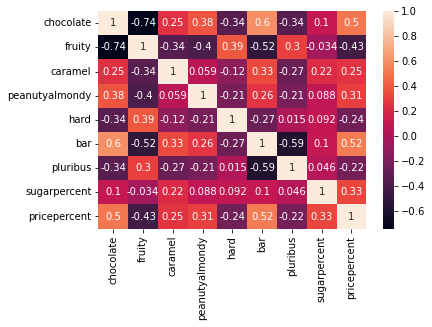

In [9]:
# визуализируем коэффициенты корреляции
sns.heatmap(data1.corr(),annot=True)

<AxesSubplot:>

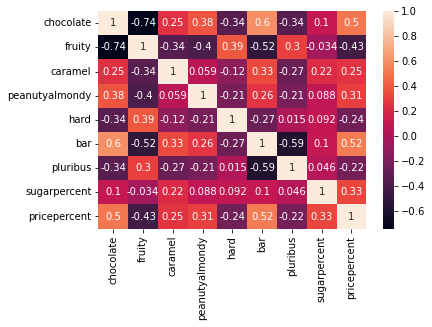

In [10]:
sns.heatmap(data.corr(),annot=True)

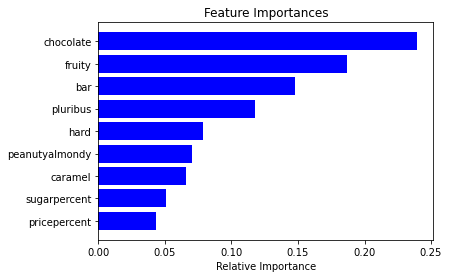

In [11]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(data1,data1)
features = data1.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

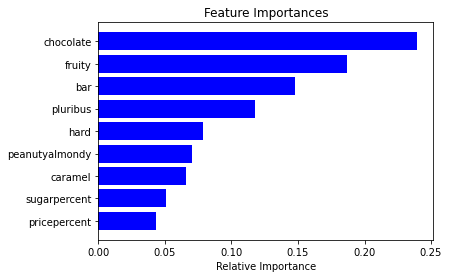

In [12]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

model.fit(data,data)
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
from sklearn import preprocessing
cols = data1.columns
d = preprocessing.normalize(data1)
data1 = pd.DataFrame(d, columns=cols)
data1.head()

,chocolate,fruity,caramel,peanutyalmondy,hard,bar,pluribus,sugarpercent,pricepercent
0,0.483627,0.000000,0.483627,0.0,0.0,0.483627,0.0,0.354015,0.415919
1,0.617103,0.000000,0.000000,0.0,0.0,0.617103,0.0,0.372730,0.315340
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.094404,0.995534
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.021521,0.999768
4,0.000000,0.693049,0.000000,0.0,0.0,0.000000,0.0,0.627903,0.354148


In [14]:
data1

,chocolate,fruity,caramel,peanutyalmondy,hard,bar,pluribus,sugarpercent,pricepercent
0,0.483627,0.000000,0.483627,0.0,0.000000,0.483627,0.000000,0.354015,0.415919
1,0.617103,0.000000,0.000000,0.0,0.000000,0.617103,0.000000,0.372730,0.315340
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.094404,0.995534
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.021521,0.999768
4,0.000000,0.693049,0.000000,0.0,0.000000,0.000000,0.000000,0.627903,0.354148
...,...,...,...,...,...,...,...,...,...
80,0.000000,0.970437,0.000000,0.0,0.000000,0.000000,0.000000,0.213496,0.112571
81,0.000000,0.703231,0.000000,0.0,0.703231,0.000000,0.000000,0.065401,0.081575
82,0.000000,0.674823,0.000000,0.0,0.000000,0.000000,0.674823,0.211220,0.211220
83,0.000000,0.000000,0.689101,0.0,0.689101,0.000000,0.000000,0.128173,0.183990


In [15]:
y = data["caramel"].astype("float64")
x = data.drop("caramel", axis=1)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
    # разбиваем выборку на тестовую и отложенную (30%)
    # Паоаметр random_state используется в качестве начального значения для генератора чисел random.
    # Это гарантирует, что наборы данных train и test не будут изменяться при каждом новом выполнении кода.
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=10)     
print("\nРазмерность X_train.shape, X_valid.shape")
print(X_train.shape, X_valid.shape)

print("\nРазмерность y_train.shape, y_valid.shape")
print(y_train.shape, y_valid.shape)


Размерность X_train.shape, X_valid.shape
(59, 8) (26, 8)

Размерность y_train.shape, y_valid.shape
(59,) (26,)


In [17]:
import warnings
warnings.filterwarnings("ignore")
print("\nДерево решений")
    # Строим  дерево
first_tree = DecisionTreeClassifier(random_state=10)
first_tree = first_tree.fit(X_train,y_train) 
    # оценка модели с помощью кросс-валидации
print(cross_val_score(first_tree, X_valid, y_valid, cv=5))
    # среднее по пяти оценкам
tree_first_result = np.mean(cross_val_score(first_tree, X_valid, y_valid, cv=5))
print(tree_first_result)


Дерево решений
[0.5 0.8 0.6 0.8 0.6]
0.66


In [18]:
y = data1["caramel"].astype("int64")
x = data1.drop("caramel", axis=1)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
    # разбиваем выборку на тестовую и отложенную (30%)
    # Паоаметр random_state используется в качестве начального значения для генератора чисел random.
    # Это гарантирует, что наборы данных train и test не будут изменяться при каждом новом выполнении кода.
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=10)     
print("\nРазмерность X_train.shape, X_valid.shape")
print(X_train.shape, X_valid.shape)

print("\nРазмерность y_train.shape, y_valid.shape")
print(y_train.shape, y_valid.shape)


Размерность X_train.shape, X_valid.shape
(59, 8) (26, 8)

Размерность y_train.shape, y_valid.shape
(59,) (26,)


In [20]:
import warnings
warnings.filterwarnings("ignore")
print("\nДерево решений")
    # Строим  дерево
first_tree = DecisionTreeClassifier(random_state=10)
first_tree = first_tree.fit(X_train,y_train) 
    # оценка модели с помощью кросс-валидации
print(cross_val_score(first_tree, X_valid, y_valid, cv=5))
    # среднее по пяти оценкам
tree_first_result = np.mean(cross_val_score(first_tree, X_valid, y_valid, cv=5))
print(tree_first_result)


Дерево решений
[1. 1. 1. 1. 1.]
1.0
